# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [1]:
import numpy as np
import sys
import pandas as pd
from task import Task
from agents.agent import Quadcopter_Agent
from collections import defaultdict, deque 

# Define hyperparameters for training the agent
alpha = 0.1 # step-size parameter
gamma = 0.80 # discount value
eps = 0.001 # set value of epsilon
num_episodes = 3000
plot_every = 50

In [2]:
# initialise the env
task = Task(init_pose=np.array([0., 0., 10., 10., 0., 0.]), \
            init_velocities=np.array([15., 15., 15.]), \
            init_angle_velocities=np.array([20., 20., 15.]), \
            target_pose=np.array([30., 30., 30., 0., 0., 0.]))

# initialise the agent
agent = Quadcopter_Agent(task)

# initialise score trackers
score_per_episode = deque(maxlen=num_episodes)
temp_score = deque(maxlen=plot_every)
total_score = deque(maxlen=num_episodes)

# initialise pose tracker
temp_pose_perf = deque(maxlen=num_episodes)
pose_perf = deque(maxlen=num_episodes)

for i_episode in range(1, num_episodes+1):
    
    # monitor progress
    if i_episode % 100 == 0:
        #print("\rEpisode {}/{} \n".format(i_episode, num_episodes), end="")
        sys.stdout.flush()

    state = agent.reset_episode()
   
    while True:
        action = agent.act(state, eps)

        # take action A, observe R, S'
        next_state, reward, done = task.step(action)
       
        # update Q and S <- S'
        state, score = agent.step(alpha, gamma, eps, action, reward, state, next_state)
        #print ("Episode {} - score = {}".format(i_episode, score))
       
        if done:
            temp_score.append(score)    # append score
            temp_pose_perf.append(state) # append current position or pose
            break

    if (i_episode % plot_every == 0):
        total_score.append(np.mean(temp_score))
        pose_perf.append(np.mean(temp_pose_perf, axis=0))

        # debug print to see if agent is learning after every episode
        #print('\t mean score = ', np.mean(total_score), ' best score = ', np.max(total_score))

Initial vel =  [ 15.  15.  15.]
Initial angle vel =  [ 20.  20.  15.]
Initial pose =  [  0.   0.  10.  10.   0.   0.]
Target pose =  [ 30.  30.  30.   0.   0.   0.]


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

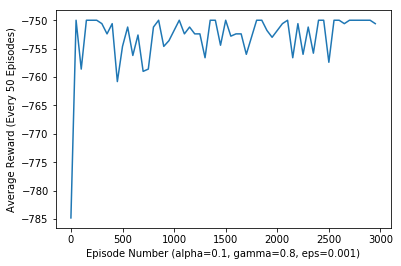

FINAL RESULT: 	 mean score =  -752.886666667  best score =  -750.0
MEAN last 10 episodes =  -757.4 Variance =  4.51333333333


In [3]:
import matplotlib.pyplot as plt

# plot performance
x_axis_label = 'Episode Number (alpha={}, gamma={}, eps={})'.format(alpha, gamma, eps)
plt.plot(np.linspace(0, num_episodes, len(total_score), endpoint=False), np.asarray(total_score))
plt.xlabel(x_axis_label)
plt.ylabel('Average Reward (Every %d Episodes)' % plot_every)

plt.show()


print('FINAL RESULT: \t mean score = ', np.mean(total_score), ' best score = ', np.max(total_score))
print('MEAN last 10 episodes = ', np.mean(total_score[-10]), 'Variance = ', np.mean(total_score)-np.mean(total_score[-10]))

## Quadcopter Trajectory Performance ##  
The following displays the X, Y an Z trajectory over the training the episodes.
With the environment initialized as such (see print statements below), the Quadcopter is near 100% to achieving its intended goal - to reach the pose of [30, 30, 30, 0, 0, 0].

----------- Environment init ------------
Initial vel =  [ 15.  15.  15.]
Initial angle vel =  [ 20.  20.  15.]
Initial pose =  [  0.   0.  10.  10.   0.   0.]
Target pose =  [ 30.  30.  30.   0.   0.   0.]
Final pose =  [ 28.37864941  29.5866781   27.67939018   1.59109923   4.15769862
   2.5561538 ]


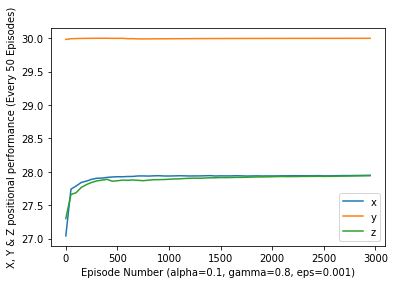

In [4]:
print ('----------- Environment init ------------')
print ('Initial vel = ', task.sim.init_velocities)
print ('Initial angle vel = ', task.sim.init_angle_velocities)
print ('Initial pose = ', task.sim.init_pose)
print ('Target pose = ', task.target_pose)
print ('Final pose = ', task.sim.pose)

# plot positional performance

x_axis_label = 'Episode Number (alpha={}, gamma={}, eps={})'.format(alpha, gamma, eps)

plt.plot(np.linspace(0, num_episodes, len(pose_perf), endpoint=False), np.asarray(pose_perf)[:,0:1], label='x')
plt.plot(np.linspace(0, num_episodes, len(pose_perf), endpoint=False), np.asarray(pose_perf)[:,1:2], label='y')
plt.plot(np.linspace(0, num_episodes, len(pose_perf), endpoint=False), np.asarray(pose_perf)[:,2:3], label='z')
plt.legend()
plt.xlabel(x_axis_label)
plt.ylabel('X, Y & Z positional performance (Every %d Episodes)' % plot_every)

plt.show()